## Importing packages

In [31]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from env import host, user, password
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import wrangle

## Acquiring grocery dataset

In [2]:
def get_grocery_data(host = host, user = user, password = password):
    db = 'grocery_db'
    return pd.read_sql('SELECT * FROM grocery_customers', f'mysql+pymysql://{user}:{password}@{host}/{db}')

In [3]:
grocery = get_grocery_data()

In [4]:
grocery

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,435,1,3,29703,12051,16027,13135,182,2204
436,436,1,3,39228,1431,764,4510,93,2346
437,437,2,3,14531,15488,30243,437,14841,1867
438,438,1,3,10290,1981,2232,1038,168,2125


### Making the clusters

<AxesSubplot:xlabel='Fresh', ylabel='Milk'>

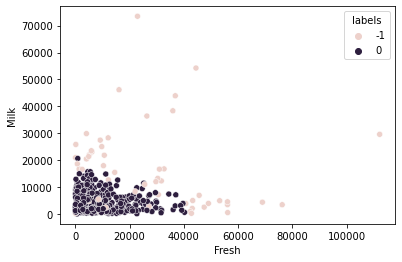

In [70]:
cluster_grocery = grocery[['Fresh', 'Milk', 'Grocery', 'Frozen']]
np_array = cluster_grocery.values.astype("float32", copy = False)
stscaler = StandardScaler().fit(np_array)
np_array = stscaler.transform(np_array)
dbsc = DBSCAN(eps = .85, min_samples = 15).fit(np_array)
labels = dbsc.labels_
cluster_grocery['labels'] = labels
cluster_grocery.labels.value_counts()

sns.scatterplot(cluster_grocery.Fresh, cluster_grocery.Milk, hue=cluster_grocery.labels)

<AxesSubplot:xlabel='Grocery', ylabel='Frozen'>

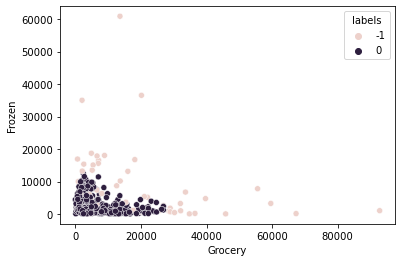

In [71]:
sns.scatterplot(cluster_grocery.Grocery, cluster_grocery.Frozen, hue=cluster_grocery.labels)

In [10]:
cluster_grocery.labels.value_counts()

 0    380
-1     60
Name: labels, dtype: int64

In [11]:
the_in = cluster_grocery[cluster_grocery['labels'] == 0]
the_out = cluster_grocery[cluster_grocery['labels'] == -1]

In [12]:
# Outliers seem to include only those that are extremely high for this data set

the_in.describe(), the_out.describe()

(              Fresh          Milk       Grocery        Frozen  labels
 count    380.000000    380.000000    380.000000    380.000000   380.0
 mean    9875.215789   4298.215789   6404.002632   2281.886842     0.0
 std     8595.883828   3517.576334   5849.030251   2364.959897     0.0
 min        3.000000     55.000000      3.000000     25.000000     0.0
 25%     2989.750000   1432.500000   2061.500000    668.250000     0.0
 50%     7678.500000   3274.000000   4099.500000   1391.000000     0.0
 75%    15099.000000   6329.500000   9435.500000   2996.500000     0.0
 max    40254.000000  15729.000000  26870.000000  11559.000000     0.0,
                Fresh          Milk       Grocery        Frozen  labels
 count      60.000000     60.000000     60.000000     60.000000    60.0
 mean    25459.150000  15283.916667  17750.683333   8075.550000    -1.0
 std     22410.532905  14826.172990  18415.479834  10485.801907     0.0
 min         3.000000    286.000000    471.000000     36.000000    -1.0


## Zillow dataset

In [80]:
df = wrangle.acquire_zillow()
df = wrangle.handle_missing_values(df)
df = df[(df['propertylandusetypeid'] == 261) | (df['propertylandusetypeid'] == 262) | (df['propertylandusetypeid'] == 263) | (df['propertylandusetypeid'] == 273) | (df['propertylandusetypeid'] == 275) | (df['propertylandusetypeid'] == 276) | (df['propertylandusetypeid'] == 279)]
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
    & (df.calculatedfinishedsquarefeet>350)]
df.drop(columns = ['finishedsquarefeet12', 'propertycountylandusecode', 'propertyzoningdesc',
    'regionidcity', 'assessmentyear', 'id', 'fullbathcnt'], inplace = True)
df.fips.replace({6037: 'Los Angeles', 6059: 'Orange', 6111: 'Ventura'}, inplace = True)
df.rename(columns = {'fips': 'county'}, inplace = True)
df.unitcnt.fillna(1, inplace = True)
df.heatingorsystemdesc.fillna('None', inplace = True)
df.lotsizesquarefeet.fillna(7313, inplace = True)
df.buildingqualitytypeid.fillna(6.0, inplace = True)

In [81]:
df

,parcelid,propertylandusetypeid,heatingorsystemtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,county,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,max(logerror),transactiondate,heatingorsystemdesc,propertylandusedesc
0,10711855,261.0,2.0,2.0,3.0,8.0,2.0,2107.0,Los Angeles,34222559.0,...,1972.0,249655.0,624139.0,374484.0,7659.36,6.037113e+13,-0.007357,2017-07-07,Central,Single Family Residential
1,10711877,261.0,2.0,2.0,4.0,8.0,2.0,1882.0,Los Angeles,34220261.0,...,1972.0,253000.0,660000.0,407000.0,8123.91,6.037113e+13,0.021066,2017-08-29,Central,Single Family Residential
2,10711888,261.0,2.0,2.0,4.0,8.0,2.0,1882.0,Los Angeles,34222491.0,...,1972.0,257591.0,542923.0,285332.0,6673.24,6.037113e+13,0.077174,2017-04-04,Central,Single Family Residential
3,10711910,261.0,2.0,2.0,3.0,8.0,2.0,1477.0,Los Angeles,34221864.0,...,1960.0,57968.0,78031.0,20063.0,1116.46,6.037113e+13,-0.041238,2017-03-17,Central,Single Family Residential
4,10711923,261.0,2.0,2.0,4.0,8.0,2.0,1918.0,Los Angeles,34220619.0,...,1960.0,167869.0,415459.0,247590.0,5239.85,6.037113e+13,-0.009496,2017-03-24,Central,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77362,167636727,261.0,2.0,3.0,4.0,4.0,3.0,2670.0,Los Angeles,34681736.0,...,2006.0,182200.0,242900.0,60700.0,3865.75,NaN,0.016445,2017-07-07,Central,Single Family Residential
77365,167637054,261.0,7.0,1.0,2.0,7.0,1.0,756.0,Los Angeles,33863071.0,...,1953.0,20083.0,84683.0,64600.0,1631.15,NaN,-0.217256,2017-01-19,Floor/Wall,Single Family Residential
77369,167637371,261.0,2.0,5.0,4.0,6.0,5.0,4000.0,Los Angeles,34089958.0,...,2013.0,1664376.0,2597367.0,932991.0,54391.29,NaN,2.069414,2017-07-31,Central,Single Family Residential
77370,167638003,261.0,2.0,3.0,3.0,4.0,3.0,2108.0,Los Angeles,34126076.0,...,2014.0,303559.0,709659.0,406100.0,8621.13,NaN,-0.158701,2017-06-14,Central,Single Family Residential


In [82]:
zillow = df[['bedroomcnt', 'calculatedfinishedsquarefeet']]
np_array = zillow.values.astype("float32", copy = False)
stscaler = StandardScaler().fit(np_array)
np_array = stscaler.transform(np_array)
dbsc = DBSCAN(eps = .95, min_samples = 1000).fit(np_array)
labels = dbsc.labels_
zillow['labels'] = labels
zillow.labels.value_counts()

 0    23295
 1    15104
 3     8335
 2     3724
-1     1766
Name: labels, dtype: int64

<AxesSubplot:xlabel='bedroomcnt', ylabel='calculatedfinishedsquarefeet'>

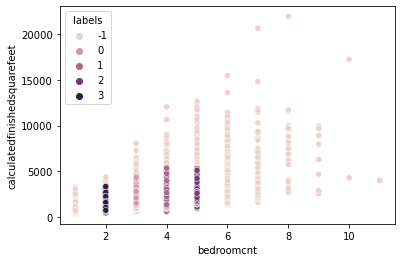

In [83]:
sns.scatterplot(zillow.bedroomcnt, zillow.calculatedfinishedsquarefeet, hue=zillow.labels)

In [84]:
the_in = zillow[zillow['labels'] != -1]
the_out = zillow[zillow['labels'] == -1]

In [85]:
# Outliers seem to be any property with less than 2 bedrooms or greater than 5, or a property with less than 468 
# square feet or greater than 5318 square feet. Other clusters seem to just be based on bedroom count

print('The IN'), print(the_in.describe()), print('------------------'), print('The OUT'), print(the_out.describe())

The IN
         bedroomcnt  calculatedfinishedsquarefeet        labels
count  50458.000000                  50458.000000  50458.000000
mean       3.281759                   1862.870427      0.942507
std        0.824843                    816.985221      1.092218
min        2.000000                    468.000000      0.000000
25%        3.000000                   1272.000000      0.000000
50%        3.000000                   1649.000000      1.000000
75%        4.000000                   2259.000000      1.000000
max        5.000000                   5510.000000      3.000000
------------------
The OUT
        bedroomcnt  calculatedfinishedsquarefeet  labels
count  1766.000000                   1766.000000  1766.0
mean      4.057191                   3626.710079    -1.0
std       2.369210                   2736.258304     0.0
min       1.000000                    360.000000    -1.0
25%       1.000000                    913.000000    -1.0
50%       5.000000                   3223.000000

(None, None, None, None, None)

In [86]:
zillow = df[['bedroomcnt', 'calculatedfinishedsquarefeet']]
np_array = zillow.values.astype("float32", copy = False)
stscaler = StandardScaler().fit(np_array)
np_array = stscaler.transform(np_array)
dbsc = DBSCAN(eps = .2, min_samples = 100).fit(np_array)
labels = dbsc.labels_
zillow['labels'] = labels
zillow.labels.value_counts()

 0    23207
 1    15004
 4     8279
 2     3718
-1     1327
 3      565
 5      124
Name: labels, dtype: int64

<AxesSubplot:xlabel='bedroomcnt', ylabel='calculatedfinishedsquarefeet'>

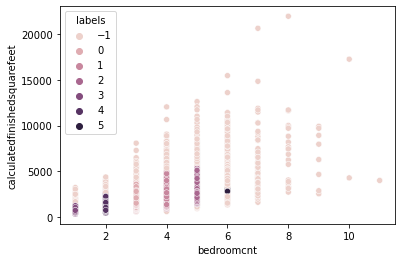

In [87]:
sns.scatterplot(zillow.bedroomcnt, zillow.calculatedfinishedsquarefeet, hue=zillow.labels)

In [88]:
the_in = zillow[zillow['labels'] != -1]
the_out = zillow[zillow['labels'] == -1]

In [89]:
print('The IN'), print(the_in.describe()), print('------------------'), print('The OUT'), print(the_out.describe())

The IN
         bedroomcnt  calculatedfinishedsquarefeet        labels
count  50897.000000                  50897.000000  50897.000000
mean       3.263336                   1841.967680      1.137022
std        0.864089                    804.085007      1.434439
min        1.000000                    360.000000      0.000000
25%        3.000000                   1260.000000      0.000000
50%        3.000000                   1638.000000      1.000000
75%        4.000000                   2243.000000      1.000000
max        6.000000                   5501.000000      5.000000
------------------
The OUT
        bedroomcnt  calculatedfinishedsquarefeet  labels
count  1327.000000                   1327.000000  1327.0
mean      5.020347                   5011.949510    -1.0
std       1.569998                   2179.472741     0.0
min       1.000000                    622.000000    -1.0
25%       4.000000                   3528.000000    -1.0
50%       5.000000                   4963.000000

(None, None, None, None, None)

## Curriculum access logs

In [67]:
data = pd.read_csv('anonymized-curriculum-access.txt', sep="\s{1}", header = None, engine='python')
data.rename(columns = {0: 'date', 1: 'access_time', 2: 'curriculum_page', 3 : 'userid', 4: 'cohort', 5: 'ip'}, inplace = True)
data['datetime'] = data.date.astype(str) + ' ' + data.access_time.astype(str)
data['datetime'] = pd.to_datetime(data.datetime)
data = data.set_index('datetime')
data.drop(columns = ['date', 'access_time'], inplace = True)
after_school = data.between_time('17:30', '08:30')

In [68]:
data

,curriculum_page,userid,cohort,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...
2021-04-21 16:41:51,jquery/personal-site,64,28.0,71.150.217.33
2021-04-21 16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
2021-04-21 16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33


In [69]:
data.cohort.value_counts()

28.0     84031
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort, dtype: int64